#Traffic Signs Recognition
In this Python project example, we will build a deep neural network model that can classify traffic signs present in the image into different categories. With this model, we are able to read and understand traffic signs which are a very important task for all autonomous vehicles.

 Please Click Below Link To download **Dataset**

[DATASET Download Link : GTSRB - German Traffic Sign Recognition Benchmark](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)

#Mounting Google Drive

In [ ]:
#pip install numpy pandas matplotlib tensorflow keras sklearn
from google.colab import drive
drive.mount("/content/gdrive")

#Unziping Dataset





In [ ]:
#!unzip "/content/gdrive/My Drive/data/archive.zip" -d "/content/gdrive/My Drive/data/dataset"

#Importing All Required Library Files

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten,Dropout
X = []
Y = []
total_class = 43
cur_directory = os.getcwd()

#Converting Images To Array

In [ ]:
#The dataset has folders from 0–42 i.e. 43 classes
cur_directory = "/content/gdrive/My Drive/data/dataset/"
for index in range(total_class):
  path = os.path.join(cur_directory,"train",str(index))
  images = os.listdir(path)
#iterating on all the images of the index folder
  for img in images:
    try:
      image = Image.open(path + '/'+ img)
      image = image.resize((30,30))
      image = np.array(image)
      X.append(image)
      Y.append(index)
    except:
        print("Error loading image")
X = np.array(X)
Y = np.array(Y)
print(X.shape, Y.shape)

(39209, 30, 30, 3) (39209,)


#One Hot Encoding The labels

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Shape of x_train: ", x_train.shape, "and y_train:",y_train.shape)
print("Shape of x_test: ", x_test.shape, " and y_test:",y_test.shape)
#one hot encoding the labels
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

Shape of x_train:  (31367, 30, 30, 3) and y_train: (31367,)
Shape of x_test:  (7842, 30, 30, 3)  and y_test: (7842,)


#Performing CNN Maxpool Softmax Adam

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Training Model

In [ ]:
epochs = 15
history = model.fit(x_train, y_train, batch_size=64, epochs=epochs,validation_data=(x_test, y_test))
model.save('/content/gdrive/My Drive/data/dataset/traffic_recognition.h5')

Epoch 1/15
491/491 [==============================] - 125s 254ms/step - loss: 2.6224 - accuracy: 0.3693 - val_loss: 1.1058 - val_accuracy: 0.7206
Epoch 2/15
491/491 [==============================] - 124s 253ms/step - loss: 1.1764 - accuracy: 0.6624 - val_loss: 0.4999 - val_accuracy: 0.8727
Epoch 3/15
491/491 [==============================] - 124s 252ms/step - loss: 0.8370 - accuracy: 0.7550 - val_loss: 0.3350 - val_accuracy: 0.9151
Epoch 4/15
491/491 [==============================] - 127s 258ms/step - loss: 0.6628 - accuracy: 0.8046 - val_loss: 0.2950 - val_accuracy: 0.9272
Epoch 5/15
491/491 [==============================] - 123s 251ms/step - loss: 0.5840 - accuracy: 0.8254 - val_loss: 0.2686 - val_accuracy: 0.9320
Epoch 6/15
491/491 [==============================] - 124s 253ms/step - loss: 0.5364 - accuracy: 0.8392 - val_loss: 0.1959 - val_accuracy: 0.9482
Epoch 7/15
491/491 [==============================] - 124s 253ms/step - loss: 0.4692 - accuracy: 0.8607 - val_loss: 0.1633 -

#Ploting Graph of Accuracy and Loss

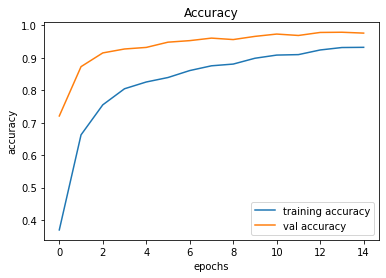

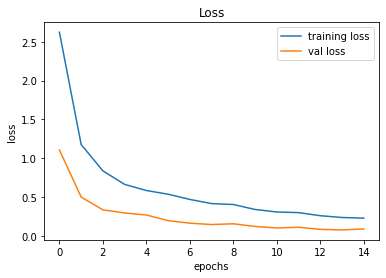

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

#Testing Model Accuracy

In [ ]:
#Testing the model
from sklearn.metrics import accuracy_score
import pandas as pd
y_test = pd.read_csv(cur_directory+"Test.csv")
labels = y_test['ClassId'].values
img_paths = y_test['Path'].values
test_data=[]
for path in img_paths:
  image = Image.open(cur_directory+path)
  image = image.resize((30,30))
  test_data.append(np.array(image))
test_data = np.array(test_data)
pred = model.predict_classes(test_data)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
accuracy_score(labels, pred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0.9371338083927158

#Practical

In [ ]:
#CHECK YOUR MODEL
from PIL import ImageTk, Image
import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model("/content/gdrive/My Drive/data/dataset/traffic_recognition.h5")
#dictionary to label all traffic signs class

classes = { 1:'Speed limit (20km/h)',
    2:'Speed limit (30km/h)',
    3:'Speed limit (50km/h)',
    4:'Speed limit (60km/h)',
    5:'Speed limit (70km/h)',
    6:'Speed limit (80km/h)',
    7:'End of speed limit (80km/h)',
    8:'Speed limit (100km/h)',
    9:'Speed limit (120km/h)',
    10:'No passing',
    11:'No passing veh over 3.5 tons',
    12:'Right-of-way at intersection',
    13:'Priority road',
    14:'Yield',
    15:'Stop',
    16:'No vehicles',
    17:'Veh > 3.5 tons prohibited',
    18:'No entry',
    19:'General caution',
    20:'Dangerous curve left',
    21:'Dangerous curve right',
    22:'Double curve',
    23:'Bumpy road',
    24:'Slippery road',
    25:'Road narrows on the right',
    26:'Road work',
    27:'Traffic signals',
    28:'Pedestrians',
    29:'Children crossing',
    30:'Bicycles crossing',
    31:'Beware of ice/snow',
    32:'Wild animals crossing',
    33:'End speed + passing limits',
    34:'Turn right ahead',
    35:'Turn left ahead',
    36:'Ahead only',
    37:'Go straight or right',
    38:'Go straight or left',
    39:'Keep right',
    40:'Keep left',
    41:'Roundabout mandatory',
    42:'End of no passing',
    43:'End no passing veh > 3.5 tons' }
def classify(file_path):
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    print(image.shape)
    pred = model.predict_classes([image])[0]
    sign = classes[pred+1]
    print(sign)
classify("/content/gdrive/My Drive/data/dataset/test/00032.png")

(1, 30, 30, 3)
Turn left ahead
